In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import geopandas as gpd
import pickle
from shapely.geometry import Point
import os
import re
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import metrics
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
# import pyreadstat
os.environ['PATH'] += os.pathsep + 'C:\\Users\\sanap\\Anaconda3\\Library\\bin\\graphviz'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import time
import numpy as np
from scikitplot.metrics import plot_roc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

# Levanto dataset de estudiantes

In [4]:
stu = pickle.load(open('stu_all.p',"rb"))
labels = pickle.load(open('labels.p',"rb"))
stu.shape

(98378, 56)

## Seleccion X e y

In [5]:
y = stu.score_range2 
weight = stu.W_FSTUWT

In [6]:
X_all = stu[[
 'DISCLISCI',
 'TEACHSUP',
 'IBTEACH',
 'TDTEACH',
 'ENVAWARE',
 'ENVOPT',
 'JOYSCIE',
 'INTBRSCI',
 'INSTSCIE',
 'SCIEEFF',
 'EPIST',
 'SCIEACT',
 'hisei',
 'OUTHOURS',
 'MMINS',
 'LMINS',
 'SMINS',
 'TMINS',
 'BELONG',
 'ANXTEST',
 'MOTIVAT',
 'COOPERATE',
 'CPSVALUE',
 'EMOSUPS',
 'PERFEED',
 'ADINST',
 'unfairteacher',
 'PARED',
 'CULTPOSS',
 'HEDRES',
 'HOMEPOS',
 'ICTRES',
 'WEALTH',
 'ESCS','Region',
 'IMMIG',
 'MISCED',
 'FISCED',
 'HISCED',
 'REPEAT',
 'DURECEC',
  'COBN_F',
  'COBN_M',
  'COBN_S',
'ST022Q01TA']]

In [7]:
X_numericas = stu[[
 'DISCLISCI',
 'TEACHSUP',
 'IBTEACH',
 'TDTEACH',
 'ENVAWARE',
 'ENVOPT',
 'JOYSCIE',
 'INTBRSCI',
 'INSTSCIE',
 'SCIEEFF',
 'EPIST',
 'SCIEACT',
 'hisei',
 'OUTHOURS',
 'MMINS',
 'LMINS',
 'SMINS',
 'TMINS',
 'BELONG',
 'ANXTEST',
 'MOTIVAT',
 'COOPERATE',
 'CPSVALUE',
 'EMOSUPS',
 'PERFEED',
 'ADINST',
 'unfairteacher',
 'PARED',
 'CULTPOSS',
 'HEDRES',
 'HOMEPOS',
 'ICTRES',
 'WEALTH',
 'ESCS',
]]

X_numericas.sample(3)

,DISCLISCI,TEACHSUP,IBTEACH,TDTEACH,ENVAWARE,ENVOPT,JOYSCIE,INTBRSCI,INSTSCIE,SCIEEFF,...,PERFEED,ADINST,unfairteacher,PARED,CULTPOSS,HEDRES,HOMEPOS,ICTRES,WEALTH,ESCS
17543,-0.5618,0.2371,1.2397,0.9505,1.0390,-0.9037,1.1049,1.4193,1.3336,0.1155,...,1.5939,0.9623,17.0,13.0,-0.8310,1.1563,-0.4261,-0.8344,-0.4370,-0.4975
68838,0.0039,1.4475,3.1829,0.4505,0.0194,3.0127,2.1635,NaN,NaN,NaN,...,1.0606,0.6524,12.0,6.0,-1.6287,-1.7837,-1.8778,-1.6394,-1.2035,-2.6162
81726,1.2422,1.4475,0.7401,0.0532,NaN,-0.3192,0.9378,0.2009,0.3708,-0.2208,...,0.5361,0.0386,8.0,14.0,-0.4504,0.0659,-1.3086,-0.8588,-1.3476,-0.7206


## Creación de Dummies para X

In [8]:
X_dummies = stu[[
  'Region',
 'IMMIG',
 'MISCED',
 'FISCED',
 'HISCED',
 'REPEAT',
 'DURECEC',
  'COBN_F',
  'COBN_M',
  'COBN_S',
'ST022Q01TA',
]]

X_dummies.sample(3)

,Region,IMMIG,MISCED,FISCED,HISCED,REPEAT,DURECEC,COBN_F,COBN_M,COBN_S,ST022Q01TA
62061,12401.0,1.0,4.0,4.0,4.0,0.0,2.0,012400,012400,012400,1.0
80678,17004.0,1.0,4.0,NaN,4.0,0.0,1.0,,017000,017000,1.0
52445,12410.0,1.0,5.0,5.0,5.0,0.0,1.0,,012400,012400,1.0


In [9]:
dummies_resul = []
for x in X_dummies.columns:
    
    dummies = pd.get_dummies(X_dummies[x], prefix=x+"_", drop_first=True)
    
    if len(dummies_resul)==0:
        dummies_resul = dummies.copy()
    else:
        dummies_resul = pd.concat([dummies_resul, dummies], axis=1)
    

In [10]:
X = pd.concat([X_numericas, dummies_resul], axis=1)

In [11]:
X.sample(3)

,DISCLISCI,TEACHSUP,IBTEACH,TDTEACH,ENVAWARE,ENVOPT,JOYSCIE,INTBRSCI,INSTSCIE,SCIEEFF,...,COBN_S__181004,COBN_S__903200,COBN_S__907600,COBN_S__915200,COBN_S__917000,COBN_S__939800,COBN_S__945800,COBN_S__948400,COBN_S__984000,ST022Q01TA__2.0
78271,-2.4162,-0.6115,-0.7406,-2.4476,NaN,-1.7932,-0.8208,-0.3744,0.3708,3.2775,...,0,0,0,0,0,0,0,0,0,0
84110,-0.1023,-0.4527,0.0919,0.0532,NaN,-1.7932,0.5094,-0.0095,0.3708,NaN,...,0,0,0,0,0,0,0,0,0,1
29587,-2.4162,NaN,NaN,0.0450,0.1088,-1.7932,0.5094,0.5414,0.0125,-0.1138,...,0,0,0,0,0,0,0,0,0,0


In [12]:
print('X     ', X.shape)
print('y     ', y.shape)
print('weight', weight.shape)

X      (98378, 149)
y      (98378,)
weight (98378,)


## TREE MODEL

In [37]:
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Saco NaNs de y, X y weight

X.dropna(axis=0, inplace=True) #sacamos filas que tienen NaN
X.shape

listado=X.index.tolist()
y=y[listado] #sacamos las mismas filas en y 
y.shape

weight_x = weight[listado]

In [38]:
# partimos en entrenamiento-prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [ ]:
# creo weight_x_train
listado_train=X_train.index.tolist()
weight_x_train=weight_x[listado_train] #sacamos las mismas filas en y 
weight_x_train.shape

In [39]:
# Ajustar un árbol de clasificación con max_depth=3
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [40]:
y_pred = treeclf.predict(X_test) #Está usando la media y el desvió estándar del train, y no del test, así no hay data leakage
confusion_matrix(y_test, y_pred)

array([[1433,  887],
       [ 898, 3287]], dtype=int64)

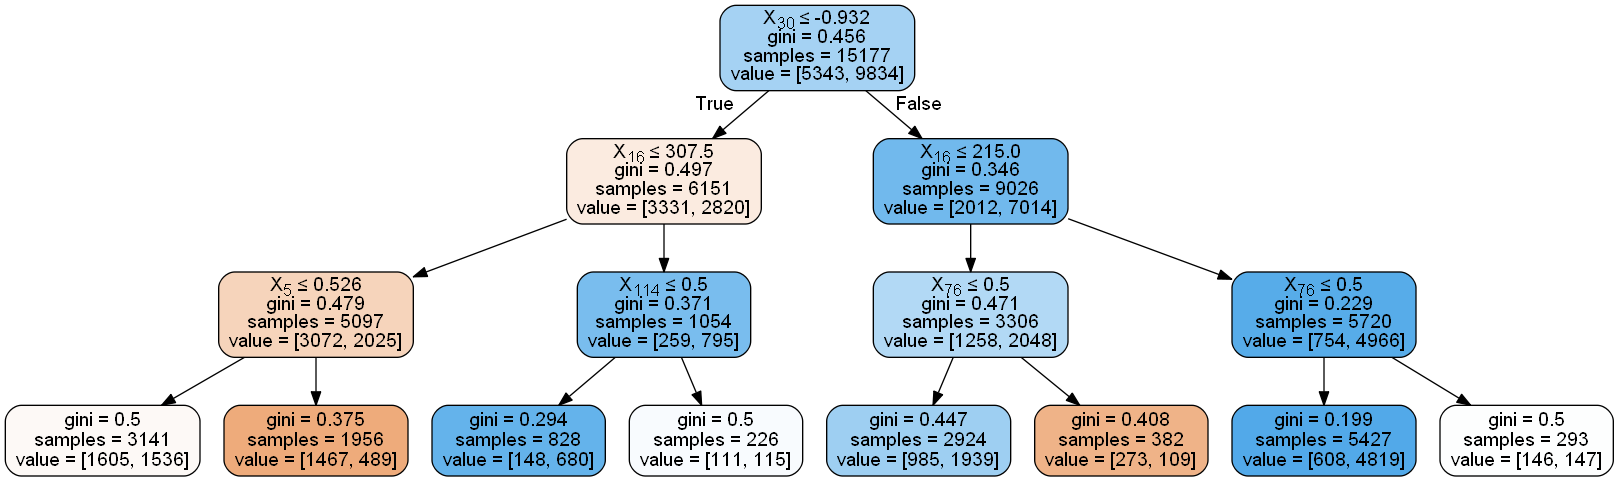

In [46]:
# Visualizar el árbol usando graphviz
dot_data = export_graphviz(treeclf, out_file=None,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

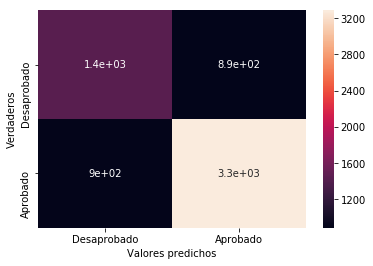

In [47]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=["Desaprobado", "Aprobado"], yticklabels=["Desaprobado", "Aprobado"])
plt.ylabel('Verdaderos')
plt.xlabel('Valores predichos');

In [48]:
print('Métricas de predicción para test Tree')
print("Accuracy:",'{:.2%}'.format(accuracy_score(y_test, y_pred)))
print("Recall:",'{:.2%}'.format(recall_score(y_test, y_pred)))
print("Precisión:",'{:.2%}'.format(precision_score(y_test, y_pred)))
print("F1Score:",'{:.2%}'.format(f1_score(y_test,y_pred)))

Métricas de predicción para test Tree
Accuracy: 72.56%
Recall: 61.77%
Precisión: 61.48%
F1Score: 61.62%


In [50]:
pd.DataFrame({'atributo':X.columns, 'importancia':treeclf.feature_importances_}).sort_values('importancia', ascending = False).head(10)

,atributo,importancia
30,HOMEPOS,0.471203
16,SMINS,0.305634
76,REPEAT__1.0,0.113807
5,ENVOPT,0.087371
114,COBN_M__048400,0.021985
103,COBN_F__945800,0.000000
97,COBN_F__181004,0.000000
98,COBN_F__903200,0.000000
99,COBN_F__907600,0.000000
100,COBN_F__915200,0.000000


## Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
# Saco NaNs de y, X y weight

X.dropna(axis=0, inplace=True) #sacamos filas que tienen NaN
X.shape

listado=X.index.tolist()
y=y[listado] #sacamos las mismas filas en y 
y.shape

weight_x = weight[listado]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [85]:
# Ajustar un Random Forest de clasificación con max_depth=3
rforestclf = RandomForestClassifier(max_depth=None, random_state=1, n_jobs=-1)
rforestclf.fit(X_train, y_train)

C:\Users\sanap\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [86]:
y_pred = rforestclf.predict(X_test) #Está usando la media y el desvió estándar del train, y no del test, así no hay data leakage
confusion_matrix(y_test, y_pred)

array([[1538,  782],
       [ 678, 3507]], dtype=int64)

In [87]:
print('Métricas de predicción para test RandomForest')
print("Accuracy:",'{:.2%}'.format(accuracy_score(y_test, y_pred)))
print("Recall:",'{:.2%}'.format(recall_score(y_test, y_pred)))
print("Precisión:",'{:.2%}'.format(precision_score(y_test, y_pred)))
print("F1Score:",'{:.2%}'.format(f1_score(y_test,y_pred)))

Métricas de predicción para test RandomForest
Accuracy: 77.56%
Recall: 66.29%
Precisión: 69.40%
F1Score: 67.81%


### Métricas de predicción para test Regresión Logística
Accuracy: 82.29%
Recall: 60.87%
Precisión: 69.04%
F1Score: 64.70%

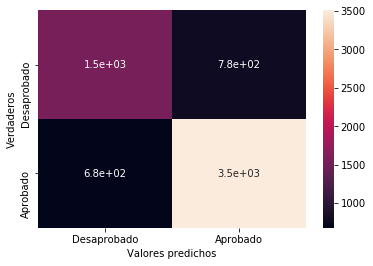

In [89]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, xticklabels=["Desaprobado", "Aprobado"], yticklabels=["Desaprobado", "Aprobado"])
plt.ylabel('Verdaderos')
plt.xlabel('Valores predichos');

## Hacemos un GridSearch sobre RF

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [40]:
param_trees = {'n_estimators': [50, 100, 200], 
               'max_features': [1, 5, 8, 10, 21], 
               'max_depth': [5, 20, 50, 70, 100], 
               'min_samples_leaf':[1, 5, 8, 10, 50]}

In [43]:
cv = StratifiedKFold(n_splits=3, random_state=41, shuffle=True)

In [44]:
grid_search_rf = GridSearchCV(rforestclf, param_grid=param_trees, cv=cv, verbose=1, n_jobs=-1)

In [45]:
grid_search_rf.fit(X_train, y_train, sample_weight=weight)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:  5.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=41, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=-1,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
 

In [46]:
RF_GS=grid_search_rf.best_estimator_

In [48]:
grid_search_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [49]:
y_predRFGS = RF_GS.predict(X_test) #Está usando la media y el desvió estándar del train, y no del test, así no hay data leakage
confusion_matrix(y_test, y_predRFGS)

array([[ 245,  258],
       [  70, 1290]], dtype=int64)

In [ ]:
print('Métricas de predicción para test RandomForest con GS')
print("Accuracy:",'{:.2%}'.format(accuracy_score(y_test, y_predRFGS)))
print("Recall:",'{:.2%}'.format(recall_score(y_test, y_predRFGS)))
print("Precisión:",'{:.2%}'.format(precision_score(y_test, y_predRFGS)))
print("F1Score:",'{:.2%}'.format(f1_score(y_test,y_predRFGS)))

In [54]:
# print('Métricas de predicción para test RandomForest con GS')
# print("Accuracy:",'{:.2%}'.format(accuracy_score(y_test, y_predRFGS)))
# print("Recall:",'{:.2%}'.format(recall_score(y_test, y_predRFGS)))
# print("Precisión:",'{:.2%}'.format(precision_score(y_test, y_predRFGS)))
# print("F1Score:",'{:.2%}'.format(f1_score(y_test,y_predRFGS)))

Métricas de predicción para test RandomForest con GS
Accuracy: 82.39%
Recall: 48.71%
Precisión: 77.78%
F1Score: 59.90%


# XGBoost

Pendiente: hacer un Gridsearch para poder tener los hiperparámetros. Después de correr XGBoost podemos hacer un results comparison ´(importances = list(rf.feature_importances_))´ para ver el peso de cada una de las variables y cuando se rompe el modelo.

In [22]:
# !pip install xgboost

In [13]:
import xgboost as xgb



In [14]:
X = pd.concat([X_numericas, dummies_resul], axis=1)
# X = X_all

In [15]:
y=stu.score_range2 #obtenemos nuestro "y" del dataframe stu

In [16]:
print('X', X.shape)
print('y', y.shape)


X (98378, 149)
y (98378,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [18]:
print('X', X_train.shape)
print('y', y_train.shape)


X (68864, 149)
y (68864,)


In [19]:
xgb = xgb.XGBClassifier(alpha=10, n_estimators=10, max_depth=5, random_state=1, n_jobs=-1)
xgb.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=10, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=1, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [20]:
y_pred = xgb.predict(X_test) #Está usando la media y el desvió estándar del train, y no del test, así no hay data leakage
confusion_matrix(y_test, y_pred)

array([[10638,  3344],
       [ 3136, 12396]], dtype=int64)

In [21]:
print('Métricas de predicción para test XGBoost')
print("Accuracy:",'{:.2%}'.format(accuracy_score(y_test, y_pred)))
print("Recall:",'{:.2%}'.format(recall_score(y_test, y_pred)))
print("Precisión:",'{:.2%}'.format(precision_score(y_test, y_pred)))
print("F1Score:",'{:.2%}'.format(f1_score(y_test,y_pred)))

Métricas de predicción para test XGBoost
Accuracy: 78.04%
Recall: 79.81%
Precisión: 78.75%
F1Score: 79.28%


In [22]:
y_predicted_xgb = xgb.predict_proba(X_test)

In [23]:
xgb_auc = roc_auc_score(y_test, y_predicted_xgb[:,1])
print(" El valor del AUC es: " , xgb_auc)

 El valor del AUC es:  0.8659272537705573


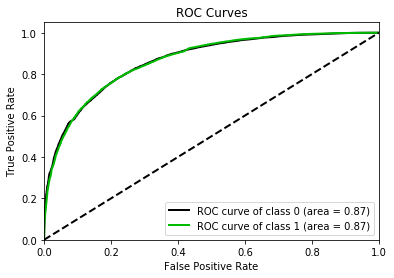

In [24]:
plot_roc(y_test,y_predicted_xgb, plot_micro=False, plot_macro=False)

In [36]:
X.shape

(98378, 149)

In [37]:
xgb.feature_importances_.shape

(149,)

In [38]:
# xgb.feature_importances_

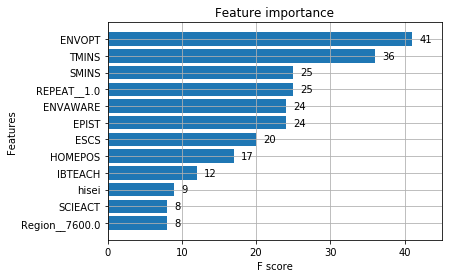

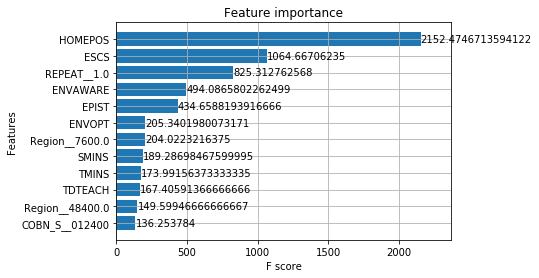

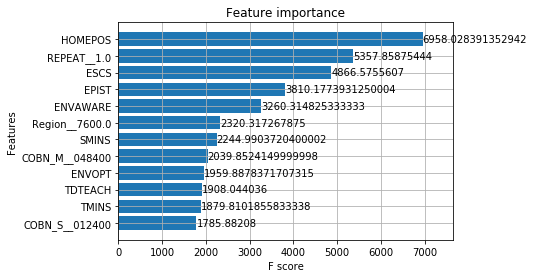

In [39]:
from xgboost import plot_importance
plot_importance(xgb, height=0.8, max_num_features=12, importance_type='weight')
plot_importance(xgb, height=0.8, max_num_features=12, importance_type='gain')
plot_importance(xgb, height=0.8, max_num_features=12, importance_type='cover')


In [40]:
fi = pd.DataFrame([X.columns, xgb.feature_importances_]).T
fi.columns = ['VAR', 'FI']
fi = fi.sort_values('FI', ascending=False)
pd.merge(fi, labels)

,VAR,FI,NAME
0,HOMEPOS,0.300455,Home possessions (WLE)
1,ESCS,0.148613,"Index of economic, social and cultural status ..."
2,ENVAWARE,0.0689676,Environmental Awareness (WLE)
3,EPIST,0.0606723,Epistemological beliefs (WLE)
4,ENVOPT,0.0286626,Environmental optimism (WLE)
5,SMINS,0.0264218,Learning time (minutes per week) - <science>
6,TMINS,0.0242868,Learning time (minutes per week) - in total
7,TDTEACH,0.0233675,Teacher-directed science instruction (WLE)
8,DISCLISCI,0.0147469,Disciplinary climate in science classes (WLE)
9,ICTRES,0.0109904,ICT Resources (WLE)


In [43]:
# ! pip install rfpimp

In [44]:
from rfpimp import permutation_importances

In [71]:
def r2(rf, X_train, y_train):
    return r2_score(y_train, rf.predict(X_train))

fimp = pd.DataFrame([])

for i in range(0, 10):
    importancia = permutation_importances(xgb, X_train, y_train, r2)
    imp = importancia.Importance.reset_index().sort_values('Importance', ascending=False).reset_index()
    imp['NRO'] = i
    imp['INDEX'] = imp.index
    fimp = pd.concat([fimp, imp])

fimp = fimp.groupby('Feature')['INDEX'].mean().reset_index().sort_values(by='INDEX')
fimp.columns = ['VAR', 'INDEX']

In [78]:
pd.merge(fimp, labels, how='left')

,VAR,INDEX,NAME
0,REPEAT__1.0,0.8,NaN
1,HOMEPOS,1.6,Home possessions (WLE)
2,ENVAWARE,2.6,Environmental Awareness (WLE)
3,EPIST,3.5,Epistemological beliefs (WLE)
4,ESCS,3.5,"Index of economic, social and cultural status ..."
5,ENVOPT,4.1,Environmental optimism (WLE)
6,TMINS,6.2,Learning time (minutes per week) - in total
7,SMINS,7.4,Learning time (minutes per week) - <science>
8,IBTEACH,12.1,Inquiry-based science teaching an learning pra...
9,SCIEACT,13.6,Index science activities (WLE)


In [75]:
fimp.head(2)

,VAR,INDEX
116,REPEAT__1.0,0.8
96,HOMEPOS,1.6


In [73]:
labels



,VAR,NAME
0,CNTRYID,Country Identifier
1,CNT,Country code 3-character
2,CNTSCHID,Intl. School ID
3,CNTSTUID,Intl. Student ID
4,CYC,PISA Assessment Cycle (2 digits + 2 character ...
5,NatCen,National Centre 6-digit Code
6,Region,Region
7,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
8,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
9,OECD,OECD country


In [69]:
fimp.head(2)

,Feature,INDEX
116,REPEAT__1.0,1.0
96,HOMEPOS,2.4


In [70]:
labels.head(2)

,VAR,NAME
0,CNTRYID,Country Identifier
1,CNT,Country code 3-character


In [26]:
# ff = fimp.groupby('Feature').INDEX.mode().reset_index().sort_values('INDEX', ascending=False)
# ff.columns = ['VAR', 'INDEX']
# ff = pd.merge(ff, labels, how='left')
# ff.sort_values('INDEX', ascending=False)

In [293]:
# importance = pd.DataFrame([xgb.feature_names_, xgb.feature_importances_]).T.sort_values(1, ascending=False)
# importance.columns = ['VAR', 'IMPORTANCE']
# pd.merge(importance, labels, how='left')

### Grid Search

In [91]:
grid_search_xgb = GridSearchCV(xgb_clf, param_grid=param_trees, cv=cv, verbose=1, n_jobs=-1)

In [ ]:
grid_search_xgb.fit(X_train, y_train, sample_weight=weight)

Fitting 3 folds for each of 375 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 19.7min


In [ ]:
XGB_GS=grid_search_xgb.best_estimator_

In [ ]:
grid_search_xgb.best_estimator_

In [ ]:
y_predXGBGS = XGB_GS.predict(X_test) #Está usando la media y el desvió estándar del train, y no del test, así no hay data leakage
confusion_matrix(y_test, y_predXGBGS)

In [ ]:
print('Métricas de predicción para test RandomForest con GS')
print("Accuracy:",'{:.2%}'.format(accuracy_score(y_test, y_predXGBGS)))
print("Recall:",'{:.2%}'.format(recall_score(y_test, y_predXGBGS)))
print("Precisión:",'{:.2%}'.format(precision_score(y_test, y_predXGBGS)))
print("F1Score:",'{:.2%}'.format(f1_score(y_test,y_predXGBGS)))

In [ ]:
plt.bar(X_train.columns, grid_search_rf.best_estimator_.feature_importances_)
plt.xticks(rotation="vertical")

### Random search

In [301]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as st
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [302]:
cv = StratifiedKFold(n_splits=3, random_state=41, shuffle=True)

In [306]:
one_to_left = st.beta(10, 1) 
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "colsample_bytree": one_to_left, #     Subsample ratio of columns when constructing each tree.
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    "gamma": st.uniform(0, 10), #     Minimum loss reduction required to make a further partition on a leaf node of the tree.
    'reg_alpha': st.uniform(0.05,10),   # L1 regularization term on weights
    "min_child_weight": st.uniform(1,20), #    Minimum sum of instance weight(hessian) needed in a child.
}

In [307]:
random_search_xgb = RandomizedSearchCV(xgb, params, cv=cv, verbose=1, n_jobs=-1)

In [308]:
xgb_rs = random_search_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.6min finished


In [309]:
y_pred_xgb_rs = xgb_rs.predict(X_test)
y_pred_xgb_rs_prob = xgb_rs.predict_proba(X_test)

In [310]:
print('Métricas de predicción para test XGBoost')
print("Accuracy:",'{:.2%}'.format(accuracy_score(y_test, y_pred_xgb_rs)))
print("Recall:",'{:.2%}'.format(recall_score(y_test, y_pred_xgb_rs)))
print("Precisión:",'{:.2%}'.format(precision_score(y_test, y_pred_xgb_rs)))
print("F1Score:",'{:.2%}'.format(f1_score(y_test,y_pred_xgb_rs)))

Métricas de predicción para test XGBoost
Accuracy: 81.31%
Recall: 82.75%
Precisión: 81.92%
F1Score: 82.33%


In [314]:
xgb_auc = roc_auc_score(y_test, y_pred_xgb_rs_prob[:,1])
print(" El valor del AUC es: " , xgb_auc)

 El valor del AUC es:  0.89929612879633


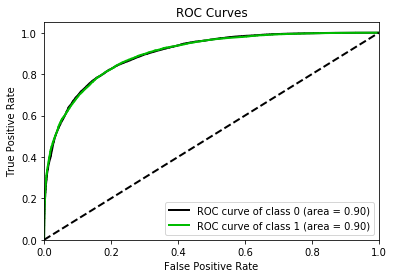

In [315]:
plot_roc(y_test,y_pred_xgb_rs_prob, plot_micro=False, plot_macro=False)

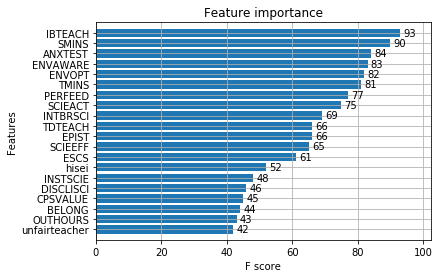

In [361]:
from xgboost import plot_importance
plot_importance(xgb_rs.best_estimator_, height=0.8, max_num_features=20)

In [365]:
fi = pd.DataFrame([X.columns, xgb_rs.best_estimator_.feature_importances_]).T
fi.columns = ['VAR', 'FI']
fi = fi.sort_values('FI', ascending=False)
pd.merge(fi, labels)

,VAR,FI,NAME
0,HOMEPOS,0.201013,Home possessions (WLE)
1,ESCS,0.0420813,"Index of economic, social and cultural status ..."
2,EPIST,0.037609,Epistemological beliefs (WLE)
3,ENVAWARE,0.0276414,Environmental Awareness (WLE)
4,ENVOPT,0.0240829,Environmental optimism (WLE)
5,TMINS,0.0189801,Learning time (minutes per week) - in total
6,SMINS,0.0158632,Learning time (minutes per week) - <science>
7,hisei,0.00960987,Index highest parental occupational status
8,DISCLISCI,0.00943589,Disciplinary climate in science classes (WLE)
9,TDTEACH,0.00938751,Teacher-directed science instruction (WLE)


# Catboost

In [165]:
# !pip install catboost

In [417]:
from catboost import CatBoostClassifier

In [418]:
model_cat = CatBoostClassifier()

In [419]:
model_cat.fit(X_train, y_train)

Learning rate set to 0.055498
0:	learn: 0.6683009	total: 105ms	remaining: 1m 45s
1:	learn: 0.6471067	total: 223ms	remaining: 1m 51s
2:	learn: 0.6270712	total: 336ms	remaining: 1m 51s
3:	learn: 0.6106579	total: 454ms	remaining: 1m 53s
4:	learn: 0.5969803	total: 561ms	remaining: 1m 51s
5:	learn: 0.5832207	total: 677ms	remaining: 1m 52s
6:	learn: 0.5714255	total: 789ms	remaining: 1m 51s
7:	learn: 0.5608482	total: 871ms	remaining: 1m 47s
8:	learn: 0.5515046	total: 1.06s	remaining: 1m 56s
9:	learn: 0.5430882	total: 1.32s	remaining: 2m 11s
10:	learn: 0.5361909	total: 1.58s	remaining: 2m 22s
11:	learn: 0.5287830	total: 1.77s	remaining: 2m 25s
12:	learn: 0.5223056	total: 1.9s	remaining: 2m 24s
13:	learn: 0.5162429	total: 2.01s	remaining: 2m 21s
14:	learn: 0.5116627	total: 2.15s	remaining: 2m 21s
15:	learn: 0.5069115	total: 2.44s	remaining: 2m 30s
16:	learn: 0.5024249	total: 2.62s	remaining: 2m 31s
17:	learn: 0.4985105	total: 2.75s	remaining: 2m 29s
18:	learn: 0.4947514	total: 2.86s	remaining: 

157:	learn: 0.4044822	total: 18.5s	remaining: 1m 38s
158:	learn: 0.4043864	total: 18.6s	remaining: 1m 38s
159:	learn: 0.4041787	total: 18.7s	remaining: 1m 38s
160:	learn: 0.4040479	total: 18.9s	remaining: 1m 38s
161:	learn: 0.4038615	total: 19s	remaining: 1m 38s
162:	learn: 0.4037064	total: 19.1s	remaining: 1m 38s
163:	learn: 0.4034961	total: 19.3s	remaining: 1m 38s
164:	learn: 0.4033061	total: 19.4s	remaining: 1m 37s
165:	learn: 0.4032044	total: 19.5s	remaining: 1m 37s
166:	learn: 0.4030031	total: 19.6s	remaining: 1m 37s
167:	learn: 0.4028172	total: 19.7s	remaining: 1m 37s
168:	learn: 0.4026028	total: 19.7s	remaining: 1m 37s
169:	learn: 0.4024433	total: 19.8s	remaining: 1m 36s
170:	learn: 0.4022656	total: 19.9s	remaining: 1m 36s
171:	learn: 0.4021202	total: 20s	remaining: 1m 36s
172:	learn: 0.4019497	total: 20.1s	remaining: 1m 36s
173:	learn: 0.4017758	total: 20.2s	remaining: 1m 35s
174:	learn: 0.4016064	total: 20.3s	remaining: 1m 35s
175:	learn: 0.4014144	total: 20.4s	remaining: 1m 3

314:	learn: 0.3839604	total: 34.6s	remaining: 1m 15s
315:	learn: 0.3838471	total: 34.7s	remaining: 1m 15s
316:	learn: 0.3837629	total: 34.8s	remaining: 1m 14s
317:	learn: 0.3836907	total: 34.9s	remaining: 1m 14s
318:	learn: 0.3835660	total: 35s	remaining: 1m 14s
319:	learn: 0.3834746	total: 35.1s	remaining: 1m 14s
320:	learn: 0.3834147	total: 35.2s	remaining: 1m 14s
321:	learn: 0.3833056	total: 35.3s	remaining: 1m 14s
322:	learn: 0.3831653	total: 35.4s	remaining: 1m 14s
323:	learn: 0.3830633	total: 35.5s	remaining: 1m 14s
324:	learn: 0.3829715	total: 35.6s	remaining: 1m 13s
325:	learn: 0.3828948	total: 35.7s	remaining: 1m 13s
326:	learn: 0.3827798	total: 35.8s	remaining: 1m 13s
327:	learn: 0.3826811	total: 35.9s	remaining: 1m 13s
328:	learn: 0.3825765	total: 36s	remaining: 1m 13s
329:	learn: 0.3825129	total: 36.1s	remaining: 1m 13s
330:	learn: 0.3824049	total: 36.1s	remaining: 1m 13s
331:	learn: 0.3823106	total: 36.2s	remaining: 1m 12s
332:	learn: 0.3822092	total: 36.3s	remaining: 1m 1

472:	learn: 0.3701018	total: 50.4s	remaining: 56.1s
473:	learn: 0.3700254	total: 50.5s	remaining: 56s
474:	learn: 0.3699652	total: 50.6s	remaining: 55.9s
475:	learn: 0.3698871	total: 50.7s	remaining: 55.8s
476:	learn: 0.3697933	total: 50.8s	remaining: 55.7s
477:	learn: 0.3696947	total: 50.9s	remaining: 55.6s
478:	learn: 0.3696003	total: 51s	remaining: 55.5s
479:	learn: 0.3695225	total: 51.1s	remaining: 55.4s
480:	learn: 0.3694452	total: 51.3s	remaining: 55.3s
481:	learn: 0.3693717	total: 51.3s	remaining: 55.2s
482:	learn: 0.3693055	total: 51.4s	remaining: 55.1s
483:	learn: 0.3692355	total: 51.5s	remaining: 54.9s
484:	learn: 0.3691336	total: 51.6s	remaining: 54.8s
485:	learn: 0.3690447	total: 51.8s	remaining: 54.8s
486:	learn: 0.3689827	total: 51.9s	remaining: 54.7s
487:	learn: 0.3689098	total: 52s	remaining: 54.6s
488:	learn: 0.3688501	total: 52.1s	remaining: 54.5s
489:	learn: 0.3687691	total: 52.3s	remaining: 54.4s
490:	learn: 0.3686952	total: 52.4s	remaining: 54.3s
491:	learn: 0.3686

633:	learn: 0.3590063	total: 1m 7s	remaining: 39.2s
634:	learn: 0.3589422	total: 1m 8s	remaining: 39.1s
635:	learn: 0.3588794	total: 1m 8s	remaining: 39.1s
636:	learn: 0.3588128	total: 1m 8s	remaining: 39s
637:	learn: 0.3587304	total: 1m 8s	remaining: 38.9s
638:	learn: 0.3586418	total: 1m 8s	remaining: 38.8s
639:	learn: 0.3585587	total: 1m 8s	remaining: 38.7s
640:	learn: 0.3585071	total: 1m 8s	remaining: 38.6s
641:	learn: 0.3584267	total: 1m 9s	remaining: 38.5s
642:	learn: 0.3583421	total: 1m 9s	remaining: 38.4s
643:	learn: 0.3582716	total: 1m 9s	remaining: 38.4s
644:	learn: 0.3582280	total: 1m 9s	remaining: 38.3s
645:	learn: 0.3581439	total: 1m 9s	remaining: 38.2s
646:	learn: 0.3580971	total: 1m 9s	remaining: 38.1s
647:	learn: 0.3580257	total: 1m 9s	remaining: 38s
648:	learn: 0.3579631	total: 1m 10s	remaining: 38s
649:	learn: 0.3578999	total: 1m 10s	remaining: 38s
650:	learn: 0.3578539	total: 1m 10s	remaining: 37.9s
651:	learn: 0.3577855	total: 1m 10s	remaining: 37.8s
652:	learn: 0.35

789:	learn: 0.3494578	total: 1m 25s	remaining: 22.6s
790:	learn: 0.3493928	total: 1m 25s	remaining: 22.5s
791:	learn: 0.3493229	total: 1m 25s	remaining: 22.4s
792:	learn: 0.3492307	total: 1m 25s	remaining: 22.3s
793:	learn: 0.3491665	total: 1m 25s	remaining: 22.2s
794:	learn: 0.3491200	total: 1m 25s	remaining: 22.2s
795:	learn: 0.3490709	total: 1m 26s	remaining: 22.1s
796:	learn: 0.3489984	total: 1m 26s	remaining: 22s
797:	learn: 0.3489483	total: 1m 26s	remaining: 21.9s
798:	learn: 0.3488957	total: 1m 26s	remaining: 21.8s
799:	learn: 0.3488220	total: 1m 26s	remaining: 21.7s
800:	learn: 0.3487449	total: 1m 26s	remaining: 21.6s
801:	learn: 0.3486771	total: 1m 27s	remaining: 21.5s
802:	learn: 0.3486234	total: 1m 27s	remaining: 21.4s
803:	learn: 0.3485619	total: 1m 27s	remaining: 21.3s
804:	learn: 0.3485070	total: 1m 27s	remaining: 21.2s
805:	learn: 0.3484546	total: 1m 27s	remaining: 21.1s
806:	learn: 0.3483965	total: 1m 27s	remaining: 21s
807:	learn: 0.3483460	total: 1m 28s	remaining: 20.

946:	learn: 0.3406051	total: 1m 44s	remaining: 5.85s
947:	learn: 0.3405686	total: 1m 44s	remaining: 5.74s
948:	learn: 0.3405401	total: 1m 44s	remaining: 5.62s
949:	learn: 0.3405015	total: 1m 44s	remaining: 5.51s
950:	learn: 0.3404410	total: 1m 44s	remaining: 5.4s
951:	learn: 0.3404084	total: 1m 44s	remaining: 5.29s
952:	learn: 0.3403467	total: 1m 44s	remaining: 5.18s
953:	learn: 0.3402870	total: 1m 45s	remaining: 5.07s
954:	learn: 0.3402298	total: 1m 45s	remaining: 4.96s
955:	learn: 0.3401809	total: 1m 45s	remaining: 4.84s
956:	learn: 0.3401350	total: 1m 45s	remaining: 4.73s
957:	learn: 0.3400617	total: 1m 45s	remaining: 4.62s
958:	learn: 0.3400195	total: 1m 45s	remaining: 4.51s
959:	learn: 0.3399615	total: 1m 45s	remaining: 4.4s
960:	learn: 0.3398939	total: 1m 45s	remaining: 4.29s
961:	learn: 0.3398265	total: 1m 45s	remaining: 4.18s
962:	learn: 0.3397838	total: 1m 45s	remaining: 4.07s
963:	learn: 0.3397288	total: 1m 46s	remaining: 3.96s
964:	learn: 0.3396699	total: 1m 46s	remaining: 3

In [420]:
y_predicted_cat = model_cat.predict(X_test)

In [421]:

y_predicted_cat_prob = model_cat.predict_proba(X_test)

In [422]:
cat_auc = roc_auc_score(y_test,y_predicted_cat_prob[:,1])
print("El valor del AUC es: ", cat_auc)

El valor del AUC es:  0.9071131261697605


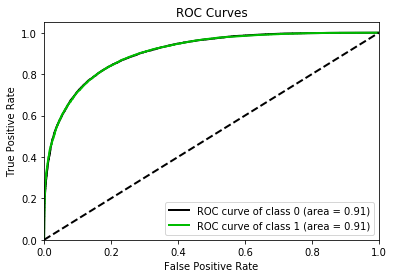

In [423]:
plot_roc(y_test,y_predicted_cat_prob, plot_micro=False, plot_macro=False)

In [424]:
print('Métricas de predicción para test Catboost')
print("Accuracy:",'{:.2%}'.format(accuracy_score(y_test, y_predicted_cat)))
print("Recall:",'{:.2%}'.format(recall_score(y_test, y_predicted_cat)))
print("Precisión:",'{:.2%}'.format(precision_score(y_test, y_predicted_cat)))
print("F1Score:",'{:.2%}'.format(f1_score(y_test,y_predicted_cat)))

Métricas de predicción para test Catboost
Accuracy: 82.16%
Recall: 83.57%
Precisión: 82.71%
F1Score: 83.14%


In [425]:
importance = pd.DataFrame([model_cat.feature_names_, model_cat.feature_importances_]).T.sort_values(1, ascending=False)
importance.columns = ['VAR', 'IMPORTANCE']
pd.merge(importance, labels, how='left')

,VAR,IMPORTANCE,NAME
0,ENVOPT,5.79476,Environmental optimism (WLE)
1,REPEAT__1.0,5.71258,NaN
2,EPIST,5.49955,Epistemological beliefs (WLE)
3,TMINS,5.23125,Learning time (minutes per week) - in total
4,SMINS,4.89345,Learning time (minutes per week) - <science>
5,ENVAWARE,4.85063,Environmental Awareness (WLE)
6,ESCS,4.1723,"Index of economic, social and cultural status ..."
7,HOMEPOS,4.16986,Home possessions (WLE)
8,IBTEACH,3.39082,Inquiry-based science teaching an learning pra...
9,TDTEACH,2.93128,Teacher-directed science instruction (WLE)


### Random Search

In [430]:
one_to_left = st.beta(10, 1) 
params = {  
    "n_estimators": st.randint(20,40), # Number of boosted trees to fit.
    "max_depth": st.randint(3, 12),     # Maximum tree depth for base learners.
    "learning_rate": st.uniform(0.05, 0.4), #     Boosting learning rate (xgb’s “eta”)
    "subsample": one_to_left,     # Subsample ratio of the training instance.
    'reg_lambda': st.uniform(0.05,10),  } # L1 regularization term on weights
#     "min_child_weight": st.uniform(1,20), }#    Minimum sum of instance weight(hessian) needed in a child.

In [431]:
random_search_cat = RandomizedSearchCV(model_cat, params, cv=cv, verbose=1, n_jobs=-1)

In [433]:
cat_rs = random_search_cat.fit(X_train, y_train)

In [ ]:
y_pred_cat_rs = cat_rs.predict(X_test)
y_pred_cat_rs_prob = cat_rs.predict_proba(X_test)

In [ ]:
print('Métricas de predicción para test RandomForest con GS')
print("Accuracy:",'{:.2%}'.format(accuracy_score(y_test, y_pred_cat_rs)))
print("Recall:",'{:.2%}'.format(recall_score(y_test, y_pred_cat_rs)))
print("Precisión:",'{:.2%}'.format(precision_score(y_test, y_pred_cat_rs)))
print("F1Score:",'{:.2%}'.format(f1_score(y_test,y_pred_cat_rs)))